In [ ]:
!pip install PyPDF2

     |████████████████████████████████| 81kB 3.4MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61085 sha256=26d36d749baf709f7b0ab0c8dd9988b5135e620eb71a515544dcd765c333fb52
  Stored in directory: /tmp/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [ ]:
import PyPDF2
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
filename = '../input/manifesto/manibook'
open_filename = open(filename, 'rb')

ind_manifesto = PyPDF2.PdfFileReader(open_filename)


In [ ]:
total_pages = ind_manifesto.numPages
total_pages

28

In [ ]:
!pip install textract

     |████████████████████████████████| 5.6MB 7.8MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 32.8MB 204kB/s 
     |████████████████████████████████| 8.9MB 23.6MB/s 
     |████████████████████████████████| 112kB 26.8MB/s 
     |████████████████████████████████| 9.7MB 24.7MB/s 
     |████████████████████████████████| 81kB 7.5MB/s 
  Created wheel for docx2txt: filename=docx2txt-0.8-cp36-none-any.whl size=3965 sha256=cb1120800a0634886343c611f564b4bf3abf55968672a09f865d497053a7a470
  Stored in directory: /tmp/.cache/pip/wheels/b2/1f/26/a051209bbb77fc6bcfae2bb7e01fa0ff941b82292ab084d596
  Created wheel for python-pptx: filename=python_pptx-0.6.18-cp36-none-any.whl size=275707 sha256=b7e4d4dea49f49648a93e7b3c97a96b917444b3a258041e96ac14af285b86d41
  Stored in directory: /tmp/.cache/pip/wheels/1f/1f/2c/29acca422b420a0b5210bd2cd7e9669804520d602d2462f20b
  Created wheel for EbookLib: f

In [ ]:
import textract   

In [ ]:
count = 0
text  = ''

# Lets loop through, to read each page from the pdf file
while(count < total_pages):
    # Get the specified number of pages in the document
    mani_page  = ind_manifesto.getPage(count)
    # Process the next page
    count += 1
    # Extract the text from the page
    text += mani_page.extractText()
   

In [ ]:
if text != '':
    text = text
    
else:
    textract.process(open_filename, method='tesseract', encoding='utf-8', langauge='eng' )    

In [ ]:
!pip install autocorrect

     |████████████████████████████████| 19.1MB 4.9MB/s 
  Created wheel for autocorrect: filename=autocorrect-0.4.4-cp36-none-any.whl size=19134813 sha256=33354aa1b1d4ad81be0b1f56b8db0d0da07c9aaf3aeaa9f7576693573fb49687
  Stored in directory: /tmp/.cache/pip/wheels/e5/80/6d/feed99c22f3f15b0b6881569dc9021f7e94b6464aa0688d819
Successfully built autocorrect


In [ ]:
from autocorrect import Speller
from nltk.tokenize import word_tokenize


def to_lower(text):

    """
    Converting text to lower case as in, converting "Hello" to  "hello" or "HELLO" to "hello".
    """
    
    # Specll check the words
    spell  = Speller(lang='en')
    
    texts = spell(text)
    
    return ' '.join([w.lower() for w in word_tokenize(text)])

lower_case = to_lower(text)
print(lower_case)

table of content a . introduction 1-2 b . improving sanitation ! 3-7 c. strategies for government 7-9 d. the economy ! 9-11 e. infrastructure ! 11-15 f. industry ! 17-23 g. social services ! 23-25 h. summ ary 25-26 a . introduction 1 . nearly 30 years after our heroes and heroines sacrificed , many tortured , or imprisoned in the fight to gain our independence , self -determination and socioeconomic development , it is time to ask if the promises of freedom are being delivered . we need to look closely and constructively at what is good in namibia , what is not so good and what needs to be done to meet our expectations . we can not blame the outside world or other countries for our troubles . we are a sma ll country with large resources , resources the world needs . some african countries with fewer resources and bigger populations are outperforming us economically . something must be wrong with our strategies and decisions . this manifesto sets out what we need to do to install good g

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell

In [ ]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    # Initialize the stopwords variable, which is a list of words ('and', 'the', 'i', 'yourself', 'is') that do not hold much values as key words
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
    
    # Removing prefixed 'b'
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    
    
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [ ]:
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]

# lets print out the output from our function above and see how the data looks like
clean_data = ' '.join(lemmatized_word)
print(clean_data)


table content introduction b improving sanitation strategy government economy infrastructure industry social service summ ary introduction nearly year hero heroine sacrificed many tortured imprisoned fight gain independence self socioeconomic development time ask promise freedom delivered need look closely constructively good namibia good need done meet expectation blame outside world country trouble sma country large resource resource world need african country fewer resource bigger population outperforming u economically something must wrong strategy decision manifesto set need install good governance identifies priority return benefit countryõs rich people struggle intended simply replace rich white people rich black people provide opportunity people participate building enjoying countryõs rich government living peopleõs expectation must due either people running government system government course namibia plagu ed common weakness emerging nation ð self elite whose initial intention

In [ ]:
import pandas as pd


In [ ]:
df = pd.DataFrame([clean_data])
df.columns = ['script']
df.index = ['Itula']
df

,script
Itula,table content introduction b improving sanitat...


In [ ]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = df.script
vect = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect = vect.fit_transform(corpus)

In [ ]:
feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df.index
data_vect_feat

,abandoning,ability,able,abridge,abroad,abuse,academia,academic,accelerate,accelerating,...,youth,youthfulness,zambezi,òjobs,òlift,ònatural,òthe,òunspoiltó,ôall,õs
Itula,1,1,2,1,1,1,1,2,2,1,...,23,1,1,1,1,1,1,1,1,1


In [ ]:
data = data_vect_feat.transpose()
data

,Itula
abandoning,1
ability,1
able,2
abridge,1
abroad,1
...,...
ònatural,1
òthe,1
òunspoiltó,1
ôall,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

# Find the top 1000 words written in the manifesto
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

    
for x in list(top_dict)[0:100]:
    print("key {}, value {} ".format(x,  top_dict[x]))
    

key Itula, value [('need', 39), ('people', 35), ('namibian', 26), ('namibia', 26), ('government', 25), ('youth', 23), ('health', 21), ('economy', 21), ('free', 18), ('citizen', 18), ('provide', 17), ('education', 16), ('service', 16), ('country', 16), ('benefit', 16), ('resource', 15), ('president', 14), ('shall', 14), ('business', 13), ('political', 13), ('water', 12), ('new', 12), ('nation', 12), ('sector', 11), ('state', 11), ('road', 11), ('access', 11), ('training', 11), ('opportunity', 11), ('land', 11), ('leader', 10), ('way', 10), ('market', 10), ('company', 10), ('party', 10), ('private', 10), ('good', 10), ('make', 9), ('activity', 9), ('mining', 9), ('industry', 9), ('future', 9), ('independent', 9), ('change', 9), ('right', 9), ('community', 9), ('policy', 9), ('especially', 8), ('time', 8), ('large', 8), ('skill', 8), ('development', 8), ('care', 8), ('worker', 8), ('tourism', 7), ('international', 7), ('institution', 7), ('public', 7), ('trade', 7), ('infrastructure', 7),

In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 100 words for each comedian
words = []
for president in data:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)

print(words[:10])

['need', 'people', 'namibian', 'namibia', 'government', 'youth', 'health', 'economy', 'free', 'citizen']


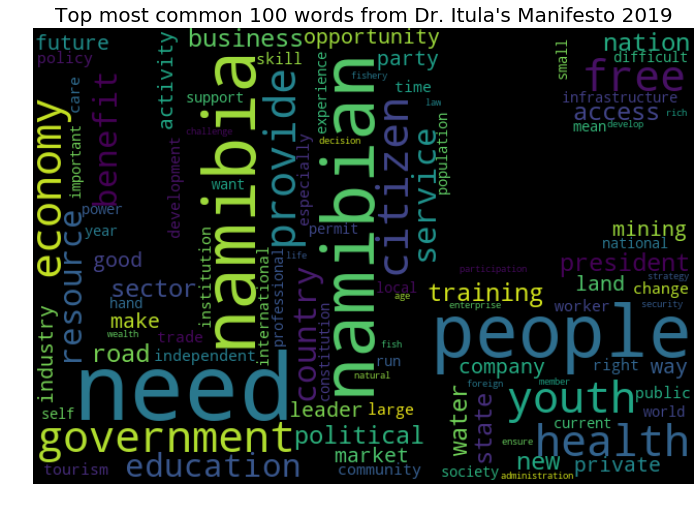

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt
import nltk

# Image used in which our world cloud output will be
img1 = imageio.imread("../input/manifesto/itula.jpeg")
hcmask1 = img1

# Get 100 words based on the 
words_except_stop_dist = nltk.FreqDist(w for w in words[:100]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words from Dr. Itula's Manifesto 2019",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('Manifesto_top_100.jpeg')

#Sentiment Analysis


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 4.7MB/s 


In [ ]:
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [ ]:
blob = TextBlob(clean_data)
blob.sentiment

Sentiment(polarity=0.07240899626355898, subjectivity=0.456152041874476)

document is **neutral** and contains almost factual information in the document rather than public opinions, beliefs and so forth.

In [ ]:
# imports
from gensim.summarization.summarizer import summarize

In [ ]:
# Print out our summarized text of the document which was converted to lower case, remember we could have opted to remove stopwords as well.

print(summarize(lower_case))

nearly 30 years after our heroes and heroines sacrificed , many tortured , or imprisoned in the fight to gain our independence , self -determination and socioeconomic development , it is time to ask if the promises of freedom are being delivered .
this manifesto sets out what we need to do to install good governance and identifies priorities to return the benefits of our countryõs riches to the people .
it was to provide opportunities to all the people to participate in building and enjoying our countryõs riches .
namibia is plagu ed by a common weakness of emerging nations ð a self -perpetuating elite whose initial intentions however good , however bold have been replaced with protecting their status , their wealth and their privileges .
the millions looted from various government institutions need to be found , for example from gipf , sme bank , ghost salaries , inflated tendering procedures and inefficient state -owned enterprises .
these looted funds could be reinvested into the be

#Topic Modelling

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
#import graphlab as gl
#import pyLDAvis.graphlab
import pyLDAvis.gensim  # don't skip this

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

Lets create a dictionary and corpus needed for topic modeling which are the two crucial inputs in implementint the LDA topc model

In [ ]:
data  = []
data.append(clean_text(lower_case))

In [ ]:
# This time we use spacy for lemmatizarion 
import spacy

# Second lemmatization of our data
def lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_output = []
    for sent in data:
        doc = nlp(" ".join(sent)) 
        texts_output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_output

nlp = spacy.load('en', disable=['parser', 'ner'])

# Lemmatize keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 2), (9, 2), (10, 12), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 1), (18, 1), (19, 7), (20, 1), (21, 1), (22, 9), (23, 1), (24, 2), (25, 2), (26, 1), (27, 1), (28, 4), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 2), (35, 2), (36, 1), (37, 1), (38, 6), (39, 3), (40, 1), (41, 1), (42, 1), (43, 2), (44, 4), (45, 1), (46, 1), (47, 2), (48, 4), (49, 3), (50, 6), (51, 2), (52, 1), (53, 10), (54, 5), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 3), (63, 2), (64, 2), (65, 1), (66, 1), (67, 1), (68, 2), (69, 3), (70, 1), (71, 1), (72, 1), (73, 4), (74, 1), (75, 1), (76, 1), (77, 1), (78, 4), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (84, 1), (85, 4), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 2), (96, 1), (97, 2), (98, 1), (99, 1), (100, 2), (101, 2), (102, 6), (103, 3), (104, 1), (105, 1), (106, 2), (107, 5), (108, 2), (109, 1), (110, 

In [ ]:
# LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, alpha='auto', num_topics=20, random_state=100,
                                           update_every=1, passes=20, per_word_topics=True)


In [ ]:
# Lets view the topics in our model
print(lda_model.print_topics())
doc_lda  = lda_model[corpus]

[(0, '0.001*"need" + 0.001*"people" + 0.001*"namibian" + 0.001*"government" + 0.001*"citizen" + 0.001*"youth" + 0.001*"benefit" + 0.001*"system" + 0.001*"provide" + 0.001*"make"'), (1, '0.001*"need" + 0.001*"people" + 0.001*"youth" + 0.001*"government" + 0.001*"economy" + 0.001*"citizen" + 0.001*"make" + 0.001*"free" + 0.001*"provide" + 0.001*"namibian"'), (2, '0.001*"people" + 0.001*"need" + 0.001*"government" + 0.001*"economy" + 0.001*"health" + 0.001*"namibian" + 0.001*"provide" + 0.001*"youth" + 0.001*"system" + 0.001*"free"'), (3, '0.001*"people" + 0.001*"namibian" + 0.001*"youth" + 0.001*"need" + 0.001*"provide" + 0.001*"government" + 0.001*"health" + 0.001*"economy" + 0.001*"country" + 0.001*"resource"'), (4, '0.013*"need" + 0.012*"people" + 0.008*"government" + 0.007*"namibian" + 0.007*"economy" + 0.007*"youth" + 0.006*"citizen" + 0.006*"provide" + 0.006*"free" + 0.005*"make"'), (5, '0.001*"need" + 0.001*"people" + 0.001*"government" + 0.001*"economy" + 0.001*"free" + 0.001*"yo

How do we make sense of this?

For topic `0` which is intrepreted as `'0.001*"need" + 0.001*"people" + 0.001*"namibian" + 0.001*"government" + 0.001*"citizen" + 0.001*"youth" + 0.001*"benefit" + 0.001*"system" + 0.001*"provide" + 0.001*"make"'`

**What does it mean?**  it means that the top 10 keywords that are part of this topic are: `need`, `people`, `namibian`, `government`, `citizen`, `youth`, `benefit`, `system`, `provide` and `make`. The numbers before the words represent the weight of the specific word on that topic, example `need` in topic `0` weigh `0.001` and this is much for all the words top 10 words in topic `0`. 


Can we deduced what topic this could be by looking on the top 10 keyswords? like what topic could trigger one to talk about `need`, `people`, and so on? We can perhaps summarize it to **POLITICS - Namibian People**

This can be done for all the remaining topics to see wether we can come up with a close judgement of each topic.


![titile](https://www.machinelearningplus.com/wp-content/uploads/2018/03/Inferring-Topic-from-Keywords.png)

#Model Perplexity and Coherence Score

**Perplexity** is an evaluation  metric on how probable (predictive likelihood) new unseen data is given the model that was learned earlier. **Topic coherence** measures a score on a single topic through measuring the degree of semantic similarity of all the high scoring words in a topic. 

Both model perplexity and topic score provide a convenient measure to judge how good a given topic model is.  

In [ ]:
# Print model perplexity
print('\nPerplexity:', lda_model.log_perplexity(corpus))


# Coherence Score

coherence_model_lda = CoherenceModel(lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)


Perplexity: -7.880327142453542
Coherence Score: 0.2730758937471215


* The coherance score is 0.27 and perpelexity is -7.88

topic's keywords

In [ ]:
pyLDAvis.enable_notebook()
vis_topics = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


In [ ]:
vis_topics

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
4     -0.079048 -0.0       1        1  99.989922
10     0.004053 -0.0       2        1   0.000530
16     0.004066 -0.0       3        1   0.000530
14     0.004066 -0.0       4        1   0.000530
7      0.004091 -0.0       5        1   0.000530
9      0.004087  0.0       6        1   0.000530
12     0.004110 -0.0       7        1   0.000530
8      0.004146  0.0       8        1   0.000530
19     0.004147  0.0       9        1   0.000530
18     0.004155  0.0      10        1   0.000530
15     0.004162  0.0      11        1   0.000530
2      0.004159 -0.0      12        1   0.000530
3      0.004168  0.0      13        1   0.000530
17     0.004167  0.0      14        1   0.000530
5      0.004174  0.0      15        1   0.000530
13     0.004183  0.0      16        1   0.000530
6      0.004232 -0.0      17        1   0.000530
0      0.004285  0.0      18        1   0.000529
1      0.004287  0.0      19        1   0.000529
11     0.004308  0.0      20        1   0.000529, topic_info=     Category       Freq        Term      Total  loglift  logprob
815   Default  37.000000        need  37.000000  30.0000  30.0000
887   Default  34.000000      people  34.000000  29.0000  29.0000
552   Default  24.000000  government  24.000000  28.0000  28.0000
372   Default  20.000000     economy  20.000000  27.0000  27.0000
806   Default  20.000000    namibian  20.000000  26.0000  26.0000
...       ...        ...         ...        ...      ...      ...
1303  Topic20   0.000012       water  11.784620  -1.6731  -7.1935
820   Topic20   0.000012         new  11.784728  -1.6732  -7.1936
154   Topic20   0.000012        care   7.872683  -1.2698  -7.1936
702   Topic20   0.000012       large   8.850781  -1.3870  -7.1937
916   Topic20   0.000012   political  12.762710  -1.7531  -7.1937

[1527 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4         1  0.974198      abroad
6         1  0.974222    academia
10        1  1.018284      access
11        1  0.974175  accessible
15        1  0.974136  accordance
...     ...       ...         ...
1313      1  0.974162       whole
1315      1  0.974163       widen
1316      1  0.974153    wildlife
1325      1  0.974255       wrong
1328      1  1.019959       youth

[504 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 11, 17, 15, 8, 10, 13, 9, 20, 19, 16, 3, 4, 18, 6, 14, 7, 1, 2, 12])